# Testing a base model

Currently i've chosen keras, as it would be quick to try things out + exam comming up (using keras) on 13th of January

In [1]:
%pip install scikit-learn keras 'tensorflow[and-cuda]' opencv-python python-dotenv pandas sqlalchemy PyMySQL matplotlib scikit-image 
#imgaugP

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2025-03-10 11:46:45.517900: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-10 11:46:45.531449: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741603605.546635   65051 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741603605.555879   65051 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-10 11:46:45.574873: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import keras
import numpy as np
import pandas as pd
import sys

In [4]:
from FrameLoader import FrameLoader
from DataRepository import DataRepository
from DataGeneratorSkills import DataGeneratorSkills
from helpers import plot

In [5]:
import os
import psutil

def process_memory():
    "Returns megabytes"
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss / 1024 / 1024 / 1024

print(f"Current memory usage: {process_memory()} gigabytes")

Current memory usage: 0.6966400146484375 gigabytes


In [6]:
repo = DataRepository()
frameloader = FrameLoader(repo)
repo.VideoNames.head()

connection established, loading frame paths
rel paths of framelabels loaded


,folderId,id,name
id,,,
2214,16,2214,free-vids/DD3/2011-brewsterbayside-dd3-junsen-...
2215,16,2215,free-vids/DD3/2011-brewsterbayside-dd3-junsen-...
1084,5,1084,competition/belgium/SR1/2011-brewsterbayside-s...
1085,5,1085,competition/belgium/SR1/2011-brewsterbayside-s...
1086,5,1086,competition/belgium/SR1/2011-brewsterbayside-s...


In [7]:
%%time

train_gen = DataGeneratorSkills(
    frameloader=frameloader,
    train_test_val="train",
    dim=(224,224),
    batch_size=1
)

connection established, loading frame paths
rel paths of framelabels loaded


/home/miked/code/judge/computervision/DataGeneratorSkills.py:145: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_skills = pd.concat(extra_skills, ignore_index=True)
/home/miked/code/judge/computervision/DataGeneratorSkills.py:145: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_skills = pd.concat(extra_skills, ignore_index=True)
/home/miked/code/judge/computervision/DataGeneratorSkills.py:145: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is d

DataGeneratorSkills init done
round nr before adding 1 and potentially shuffeling the data -1
CPU times: user 9.17 s, sys: 836 ms, total: 10 s
Wall time: 11.2 s


In [8]:
train_gen.Skills

,id,videoId,frameStart,frameEnd,type,rotations,turner1,turner2,skill,hands,feet,turntable,bodyRotations,backwards,sloppy,hard2see,fault,labeldate
1583,1844,1277,773,788,1,1,1,1,4,2,0,0,0,0,0,0,0,2025-02-26
1941,2202,688,2099,2114,1,1,3,3,2,2,2,0,0,0,0,0,0,2025-03-02
2519,2813,1353,2150,2166,4,1,1,1,1,0,2,0,0,0,0,0,0,2025-03-08
1628,1889,1277,1569,1667,5,1,1,1,1,0,2,0,0,0,0,0,0,2025-02-26
687,853,1243,1716,1728,1,1,1,1,2,0,2,0,0,0,0,0,0,2025-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,773,1243,212,225,1,1,1,1,4,2,2,0,0,0,0,0,0,2025-02-09
1503,1763,1281,1422,1440,1,1,1,1,2,0,0,0,0,0,0,0,0,2025-02-26
1148,1314,1396,2325,2355,1,1,1,1,1,0,2,0,0,0,0,0,0,2025-02-09
129,212,2216,1468,1496,1,1,3,3,7,1,1,0,0,0,0,0,0,2025-02-09


In [9]:
train_gen.BalancedSkills7

,id,videoId,frameStart,frameEnd,type,rotations,turner1,turner2,skill,hands,feet,turntable,bodyRotations,backwards,sloppy,hard2see,fault,labeldate
0,118,1178,615,637,1,2,1,1,15,0,2,0,0,1,0,0,0,2025-02-09
1,225,2216,1998,2046,6,3,1,1,17,2,2,0,0,1,0,0,0,2025-02-09
2,285,2216,4457,4512,6,1,1,1,23,2,2,0,0,1,0,0,0,2025-02-09
3,386,649,521,559,6,4,1,1,17,2,0,0,0,1,0,0,0,2025-02-09
4,495,1184,821,854,6,1,1,1,23,2,2,0,0,1,0,0,0,2025-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60928,2992,679,1369,1387,4,1,1,9,4,1,2,0,0,0,0,0,0,2025-03-10
60929,2993,679,1387,1403,4,1,7,1,2,0,0,0,0,0,0,0,0,2025-03-10
60930,2994,679,1403,1418,4,1,7,1,3,2,2,0,0,0,0,0,0,2025-03-10
60931,2995,679,1418,1436,4,1,1,1,7,2,2,0,0,0,0,0,1,2025-03-10


In [10]:
train_gen.BalancedSkills3

,id,videoId,frameStart,frameEnd,type,rotations,turner1,turner2,skill,hands,feet,turntable,bodyRotations,backwards,sloppy,hard2see,fault,labeldate
13772,1910,1277,2064,2092,1,2,1,1,10,0,1,0,0,0,0,0,0,2025-02-26
2593,1334,667,181,199,1,1,3,3,4,1,1,0,0,0,0,0,0,2025-02-09
1633,422,649,1364,1385,1,1,1,1,1,0,1,0,0,0,0,0,0,2025-02-09
6449,1959,650,773,790,1,2,3,3,7,2,1,0,0,0,0,0,0,2025-02-26
15002,1727,1281,637,655,6,1,1,1,17,2,2,0,0,0,0,0,0,2025-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1074,1202,192,206,1,1,1,1,7,1,2,0,0,0,1,1,0,2025-02-09
13172,890,1354,754,784,1,3,2,2,15,0,2,0,0,1,0,0,0,2025-02-09
14333,763,1162,1936,1951,2,0,1,1,1,0,2,0,0,0,0,0,0,2025-02-09
3355,1261,1304,1520,1531,3,1,1,1,3,2,0,0,0,0,0,0,0,2025-02-09


## Pre balance - balanced comparison

1 mostly means normal (normal jump, normal turning, DD...)

In [11]:
total_accuracy = 0
metrics = 0
def get_df_spec_balance_comparison(col, gen):
    df = pd.concat([
        gen.Skills[col].value_counts(normalize=False), 
        gen.BalancedSkills3[col].value_counts(normalize=False),
        gen.BalancedSkills5[col].value_counts(normalize=False),
        gen.BalancedSkills7[col].value_counts(normalize=False),
        gen.BalancedSkills10[col].value_counts(normalize=False),
        gen.BalancedSkills12[col].value_counts(normalize=False),
        gen.Skills[col].value_counts(normalize=True),
        gen.BalancedSkills3[col].value_counts(normalize=True),
        gen.BalancedSkills5[col].value_counts(normalize=True),
        gen.BalancedSkills7[col].value_counts(normalize=True),
        gen.BalancedSkills10[col].value_counts(normalize=True),
        gen.BalancedSkills12[col].value_counts(normalize=True),
        ], axis=1)
    df.columns = ["normal", "n3", "n5", "n7", "n10", "n12", "percentage", "c3", "c5", "c7", "c10", "c12"]
    return df

In [12]:
col = 'type' # DD, CW, SD, snapperlike, transition
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
type,,,,,,,,,,,,
1,1975,10188,19598,36868,72800,105475,0.751522,0.663454,0.614550,0.605058,0.601852,0.602315
4,308,2313,5181,10255,20183,29261,0.117199,0.150625,0.162465,0.168300,0.166857,0.167095
6,111,1067,2505,4993,9988,14388,0.042237,0.069484,0.078551,0.081942,0.082573,0.082163
5,107,637,1680,3221,6577,9442,0.040715,0.041482,0.052681,0.052861,0.054373,0.053919
2,70,474,1221,2333,4744,6905,0.026636,0.030867,0.038288,0.038288,0.039220,0.039431
3,57,677,1705,3263,6668,9645,0.021689,0.044087,0.053465,0.053551,0.055126,0.055078


In [13]:
col = 'rotations'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
rotations,,,,,,,,,,,,
1,2096,9777,19380,36631,72485,105181,0.797565,0.636689,0.607714,0.601168,0.599248,0.600636
2,317,3280,6982,13650,26853,38828,0.120624,0.213597,0.218940,0.224017,0.221999,0.221727
0,119,1047,2427,4773,9865,14112,0.045282,0.068182,0.076105,0.078332,0.081556,0.080587
3,54,655,1575,3002,5997,8677,0.020548,0.042654,0.049389,0.049267,0.049578,0.049550
4,30,410,1026,1922,3836,5540,0.011416,0.026700,0.032173,0.031543,0.031713,0.031636
6,6,89,239,455,911,1320,0.002283,0.005796,0.007495,0.007467,0.007531,0.007538
5,3,41,108,206,419,601,0.001142,0.002670,0.003387,0.003381,0.003464,0.003432
8,2,46,121,232,467,675,0.000761,0.002996,0.003794,0.003807,0.003861,0.003855
7,1,11,32,62,127,182,0.000381,0.000716,0.001003,0.001018,0.001050,0.001039


In [14]:
col = 'turner1'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
turner1,,,,,,,,,,,,
1,2050,8355,16002,30666,60411,87528,0.780061,0.544087,0.501787,0.503274,0.499430,0.499829
3,300,2793,6465,11855,23875,34535,0.114155,0.181883,0.202728,0.194558,0.197379,0.197212
2,146,1984,4093,8047,15954,23081,0.055556,0.129200,0.128347,0.132063,0.131895,0.131804
7,35,538,1236,2439,4869,7049,0.013318,0.035035,0.038758,0.040028,0.040253,0.040253
6,33,469,1134,2163,4309,6257,0.012557,0.030542,0.035560,0.035498,0.035623,0.035731
9,12,212,505,1005,2009,2899,0.004566,0.013806,0.015836,0.016494,0.016609,0.016555
4,8,118,264,509,1008,1461,0.003044,0.007684,0.008278,0.008353,0.008333,0.008343
10,7,141,346,680,1356,1949,0.002664,0.009182,0.010850,0.011160,0.011210,0.011130
5,5,66,152,295,588,848,0.001903,0.004298,0.004766,0.004841,0.004861,0.004843


In [15]:
col = 'turner2'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
turner2,,,,,,,,,,,,
1,2059,8360,16050,30689,60466,87637,0.783486,0.544413,0.503293,0.503652,0.499884,0.500451
3,291,2715,6269,11477,23096,33434,0.110731,0.176804,0.196582,0.188354,0.190939,0.190925
2,141,1915,3918,7744,15282,22092,0.053653,0.124707,0.122860,0.127090,0.126339,0.126156
6,37,555,1348,2628,5245,7598,0.014079,0.036142,0.042270,0.043129,0.043361,0.043388
7,24,423,964,1885,3762,5451,0.009132,0.027546,0.030229,0.030936,0.031101,0.031128
4,11,139,301,587,1185,1707,0.004186,0.009052,0.009439,0.009634,0.009797,0.009748
8,8,101,222,435,869,1258,0.003044,0.006577,0.006961,0.007139,0.007184,0.007184
9,7,122,297,587,1182,1702,0.002664,0.007945,0.009313,0.009634,0.009772,0.009719
10,7,141,343,671,1329,1912,0.002664,0.009182,0.010756,0.011012,0.010987,0.010918


In [16]:
col = 'skill'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
skill,,,,,,,,,,,,
1,1276,2283,5833,11574,23533,33920,0.485540,0.148672,0.182910,0.189946,0.194552,0.193700
3,383,3866,7206,13396,25780,37403,0.145738,0.251758,0.225964,0.219848,0.213128,0.213590
2,356,2271,3730,7372,15438,22180,0.135464,0.147890,0.116965,0.120985,0.127629,0.126659
4,279,2875,5115,9576,18489,27017,0.106164,0.187223,0.160395,0.157156,0.152852,0.154281
7,86,951,2351,4514,9023,13067,0.032725,0.061930,0.073722,0.074081,0.074595,0.074619
5,55,637,1612,2983,5861,8512,0.020928,0.041482,0.050549,0.048955,0.048454,0.048608
15,32,411,1003,1959,3947,5695,0.012177,0.026765,0.031452,0.032150,0.032631,0.032521
11,25,265,633,1162,2253,3261,0.009513,0.017257,0.019849,0.019070,0.018626,0.018622
10,25,300,647,1203,2346,3398,0.009513,0.019536,0.020288,0.019743,0.019395,0.019404


In [17]:
col = 'hands'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
hands,,,,,,,,,,,,
0,1682,5191,11241,22250,45772,65914,0.640030,0.338044,0.352493,0.365155,0.378406,0.376402
2,723,7922,15667,28882,55291,80265,0.275114,0.515890,0.491283,0.473996,0.457102,0.458353
1,223,2243,4982,9801,19897,28937,0.084855,0.146067,0.156225,0.160849,0.164492,0.165245


In [18]:
col = 'feet'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
feet,,,,,,,,,,,,
2,1913,8614,19035,36465,72269,104428,0.727930,0.560953,0.596896,0.598444,0.597462,0.596336
1,407,4034,7328,13868,27224,39644,0.154871,0.262699,0.229790,0.227594,0.225066,0.226387
0,308,2708,5527,10600,21467,31044,0.117199,0.176348,0.173315,0.173962,0.177472,0.177277


In [19]:
col = 'bodyRotations'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
bodyRotations,,,,,,,,,,,,
0,2609,15095,31244,59660,118369,171384,0.992770,0.983003,0.979743,0.979108,0.97858,0.978688
1,14,160,407,801,1633,2351,0.005327,0.010419,0.012763,0.013146,0.01350,0.013425
2,5,101,239,472,958,1381,0.001903,0.006577,0.007495,0.007746,0.00792,0.007886


In [20]:
col = 'turntable'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
turntable,,,,,,,,,,,,
0,2540,13965,28737,54877,108899,157759,0.966514,0.909417,0.901129,0.900612,0.900289,0.900883
1,66,995,2239,4318,8601,12376,0.025114,0.064796,0.070210,0.070865,0.071106,0.070673
2,22,396,914,1738,3460,4981,0.008371,0.025788,0.028661,0.028523,0.028604,0.028444


In [21]:
col = 'sloppy'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
sloppy,,,,,,,,,,,,
0,2541,14128,29055,55478,110172,159466,0.966895,0.920031,0.911101,0.910475,0.910813,0.910631
1,87,1228,2835,5455,10788,15650,0.033105,0.079969,0.088899,0.089525,0.089187,0.089369


In [22]:
col = 'backwards'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
backwards,,,,,,,,,,,,
0,2593,14829,30466,58170,115461,167185,0.986682,0.965681,0.955347,0.954655,0.954539,0.95471
1,35,527,1424,2763,5499,7931,0.013318,0.034319,0.044653,0.045345,0.045461,0.04529


In [23]:
col = 'hard2see'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
hard2see,,,,,,,,,,,,
0,2549,14305,29352,56093,111306,161203,0.969939,0.931558,0.920414,0.920568,0.920188,0.92055
1,79,1051,2538,4840,9654,13913,0.030061,0.068442,0.079586,0.079432,0.079812,0.07945


In [24]:
col = 'fault'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
fault,,,,,,,,,,,,
0,2518,14188,29251,55878,110686,160344,0.958143,0.923939,0.917247,0.91704,0.915063,0.915644
1,110,1168,2639,5055,10274,14772,0.041857,0.076061,0.082753,0.08296,0.084937,0.084356


In [25]:
print(f"minimum train accuracy = {(100*total_accuracy / metrics):.3f}%")

minimum train accuracy = 69.907%


<Axes: >

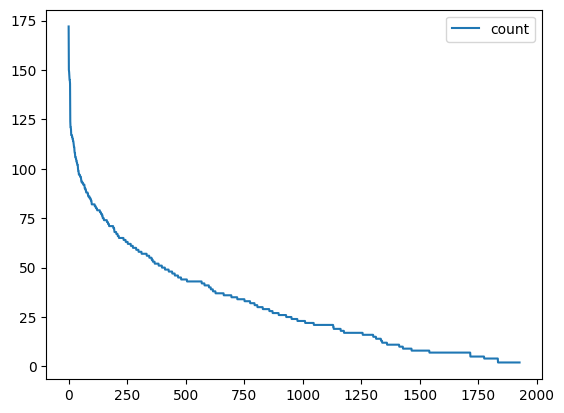

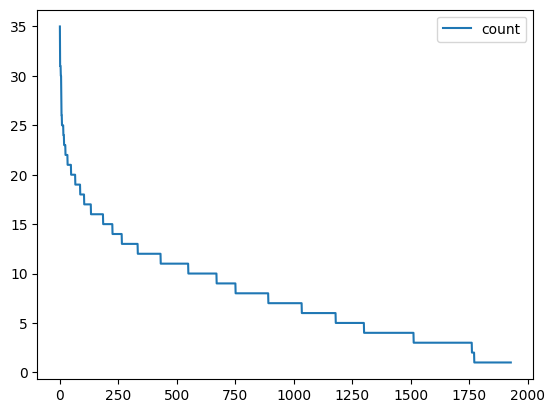

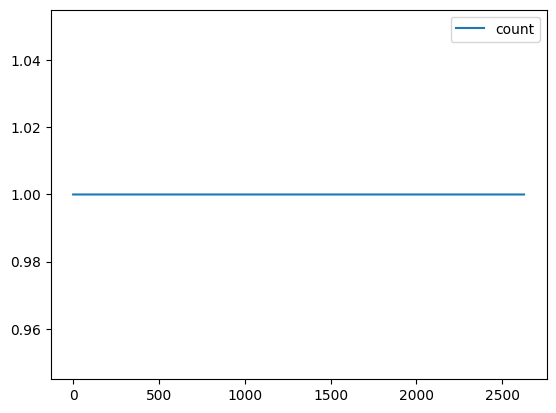

In [26]:
pd.DataFrame(train_gen.BalancedSkills7["id"].value_counts()).reset_index(drop=True).plot()
pd.DataFrame(train_gen.BalancedSkills3["id"].value_counts()).reset_index(drop=True).plot()
pd.DataFrame(train_gen.Skills["id"].value_counts()).reset_index(drop=True).plot()

In [27]:
pd.set_option("display.max_rows", 10)

## Skill balance function

In [28]:
col = 'turner2'
series_normalized_occurances = train_gen.Skills[col].value_counts(normalize=True)
max_occurance_percentage = series_normalized_occurances.iloc[0]

def get_multiplier(occurance_percentage: float, max_occurance_percentage: float, N = 10):
    """Calculate how many times more a skill needs to be added
    Returns a number in the interval [1, N["""
    assert isinstance(occurance_percentage, (int, float))
    assert isinstance(max_occurance_percentage, (int, float))
    assert occurance_percentage > 0 and occurance_percentage <= 1
    assert max_occurance_percentage > 0 and max_occurance_percentage <= 1
    assert max_occurance_percentage >= occurance_percentage, f"got {max_occurance_percentage} and {occurance_percentage}"

    multiplier = N * np.pow(1 - (np.sqrt(occurance_percentage / max_occurance_percentage)), 2)
    multiplier = multiplier if multiplier >= 1 else multiplier + 1
    multiplier_squared = multiplier * multiplier
    return multiplier_squared

for index, value in series_normalized_occurances.items():
    n3 = value * get_multiplier(value, max_occurance_percentage, N=3)
    n5 = value * get_multiplier(value, max_occurance_percentage, N=5)
    n7 = value * get_multiplier(value, max_occurance_percentage, N=7)
    n10 = value * get_multiplier(value, max_occurance_percentage, N=10)
    
    print(f"{index:2d} - {value:.3f} - {n3:.3f} - {n5:.3f} - {n7:.3f} - {n10:.3f}")

 1 - 0.783 - 0.783 - 0.783 - 0.783 - 0.783
 3 - 0.111 - 0.151 - 0.420 - 0.823 - 1.679
 2 - 0.054 - 0.143 - 0.399 - 0.781 - 1.594
 6 - 0.014 - 0.071 - 0.198 - 0.388 - 0.792
 7 - 0.009 - 0.052 - 0.145 - 0.283 - 0.578
 4 - 0.004 - 0.028 - 0.077 - 0.151 - 0.309
 8 - 0.003 - 0.021 - 0.059 - 0.115 - 0.235
 9 - 0.003 - 0.019 - 0.052 - 0.103 - 0.209
10 - 0.003 - 0.019 - 0.052 - 0.103 - 0.209
22 - 0.002 - 0.016 - 0.046 - 0.090 - 0.183
18 - 0.002 - 0.016 - 0.046 - 0.090 - 0.183
12 - 0.002 - 0.016 - 0.046 - 0.090 - 0.183
14 - 0.002 - 0.016 - 0.046 - 0.090 - 0.183
 5 - 0.001 - 0.009 - 0.024 - 0.048 - 0.098
11 - 0.001 - 0.009 - 0.024 - 0.048 - 0.098
20 - 0.001 - 0.009 - 0.024 - 0.048 - 0.098
13 - 0.001 - 0.009 - 0.024 - 0.048 - 0.098
17 - 0.001 - 0.006 - 0.017 - 0.033 - 0.067
15 - 0.001 - 0.006 - 0.017 - 0.033 - 0.067
16 - 0.001 - 0.006 - 0.017 - 0.033 - 0.067
21 - 0.000 - 0.003 - 0.009 - 0.017 - 0.035


In [29]:
max_occurance_percentage

np.float64(0.7834855403348554)

## Apply

In [30]:
info_columns = [
    'type', 'rotations', 'turner1', 'turner2', 'skill', 'turntable',
    'bodyRotations', 'hands', 'feet', 'sloppy', 'hard2see', 'fault',
    'backwards'
]

In [31]:
N = 7
balanced_skills = pd.DataFrame(columns=train_gen.Skills.columns)
for col in info_columns:
    series_normalized_occurances = train_gen.Skills[col].value_counts(normalize=True)
    max_occurance_percentage = series_normalized_occurances.iloc[0]

    for index, value in series_normalized_occurances.items():
        if value == max_occurance_percentage:
            continue
        rounded_multiplier = int(np.round(get_multiplier(value, max_occurance_percentage, N=7)))
        extra_skills = [train_gen.Skills[train_gen.Skills[col] == index] for _ in range(rounded_multiplier)]
        extra_skills.append(balanced_skills)
        balanced_skills = pd.concat(extra_skills, ignore_index=True)

/tmp/ipykernel_65051/2154607191.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_skills = pd.concat(extra_skills, ignore_index=True)


In [32]:
len(balanced_skills)

60933

In [33]:
balanced_skills["turntable"].value_counts(normalize=True)

turntable
0    0.900612
1    0.070865
2    0.028523
Name: proportion, dtype: float64